# Testing Object Localization

In [1]:
import tensorflow as tf
from train import Train
import numpy as np
import cv2
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.environ["CUDA_VISIBLE_DEVICES"] = str(0)

/Users/leonardo_a/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Load Test image

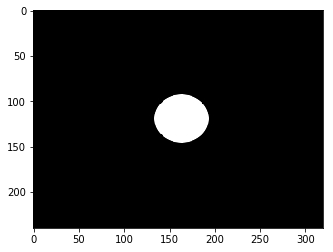

In [2]:
#test_img = scipy.misc.imread('./test_data/test_0.jpg', mode="RGB")
test_img = cv2.imread('./dataset/5.jpg')
plt.imshow(test_img)
plt.show()

### Build Graph and Restore saved Model

In [3]:
model = Train()
model.build_graph()
model_in = model.input
model_out_box = model.out_box
model_out_has_obj = model.out_has_obj
# Load tensorflow section
sess = tf.InteractiveSession()
saver = tf.train.Saver()
saver.restore(sess, "./save/model")
print('Number of parameters:',model.num_parameters)

INFO:tensorflow:Restoring parameters from ./save/model
Number of parameters: 296933


### Evaluate model on Image

In [4]:
box, has_obj = sess.run([model_out_box, model_out_has_obj],feed_dict={model_in: [test_img]})
print(box)
print(has_obj)

[[0.50326335 0.5039761  0.07120723 0.07576624]]
[[0.9999999]]


### Draw Bounding Box

x: 161, y: 120, w: 22 h: 18


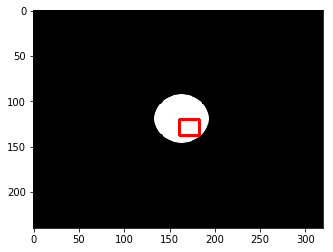

In [5]:
y,x,w,h = box[0]
x = int(x*320.0)
y = int(y*240.0)
w = int(w*320)
h = int(h*240)
print("x: %d, y: %d, w: %d h: %d" % (x,y,w,h))
cv2.rectangle(test_img, (x, y), (x + w, y + h), (255, 0, 0), 2)
plt.imshow(test_img)
plt.show()